In the example below, Principal Component Analysis (PCA) is applied to a dataset containing two highly correlated features to demonstrate how PCA identifies the direction of maximum variance and transforms the dataset into a new coordinate system. The dataset consists of Feature X, which is randomly generated, and Feature Y, which is a linear function of Feature X with added noise, creating a strong correlation between the two features. The first scatter plot (blue) represents the original dataset, where the elongated cluster of points suggests redundancy in the data, as both features contain nearly identical information. To extract the most meaningful insights, the dataset is standardized to ensure all features contribute equally, followed by the application of PCA, which finds the principal components—new axes that maximize variance. The second scatter plot (red) illustrates the transformed dataset, where Principal Component 1 (PC1) captures the majority of the variance, while Principal Component 2 (PC2) contributes only minimally (0.59%). The explained variance ratio confirms that PC1 captures 99.4% of the variance, making PC2 largely insignificant. This transformation enables dimensionality reduction while preserving essential patterns in the data, leading to more efficient machine learning models with reduced computational complexity and improved interpretability.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Generate a synthetic dataset with two highly correlated features
np.random.seed(42)
X = np.random.rand(100, 1) * 10
Y = X * 2 + np.random.normal(0, 1, (100, 1))
# Creating a DataFrame
data = pd.DataFrame(np.hstack((X, Y)), columns=['Feature X', 'Feature Y'])
# Standardize the data (important for PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
# Apply PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(scaled_data)

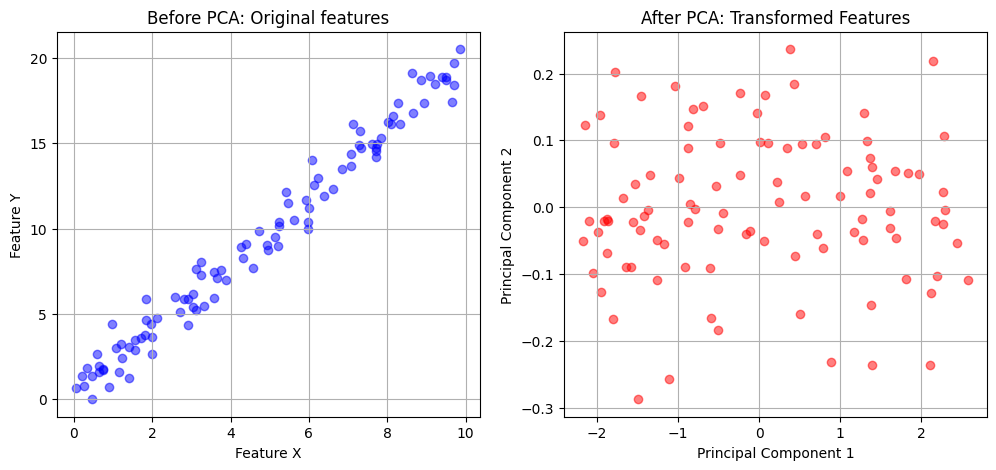

In [16]:
# Scatter plot of the original features
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(data['Feature X'], data['Feature Y'], c='blue', alpha=.5)
plt.title("Before PCA: Original features")
plt.xlabel('Feature X')
plt.ylabel('Feature Y')
plt.grid()

# Scatter plot along principal components
plt.subplot(1, 2, 2)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c='red', alpha=.5)
plt.title("After PCA: Transformed Features")
plt.xlabel("Principal Component 1")
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

In [14]:
# Displaying explained variance ratio
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.99407914, 0.00592086])

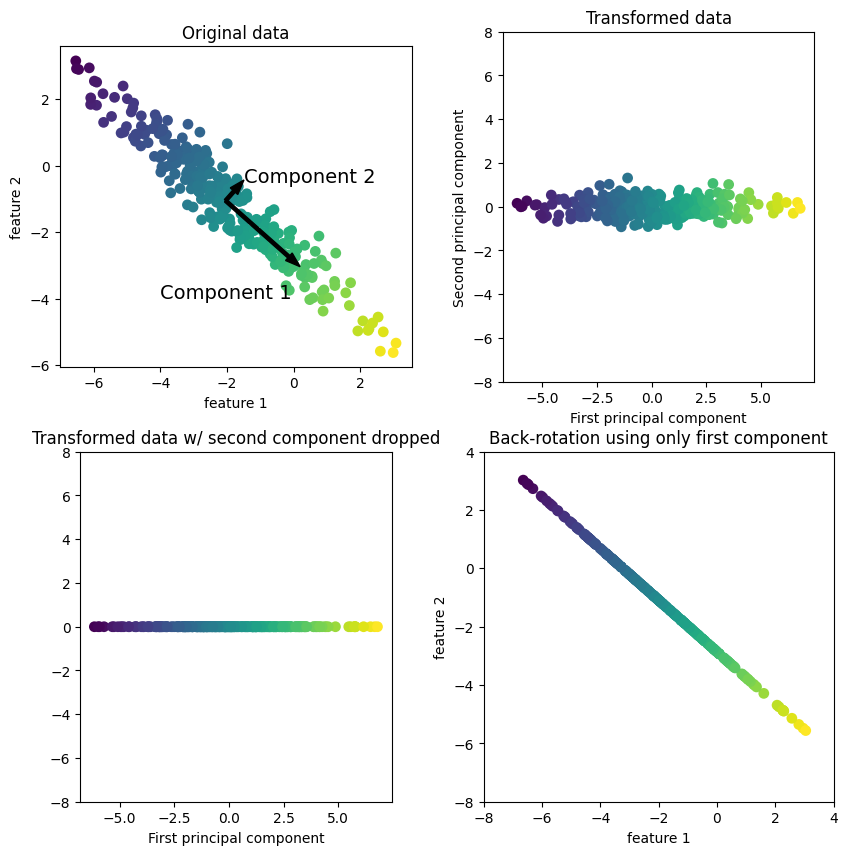

In [20]:
import mglearn
mglearn.plots.plot_pca_illustration()